### 1. **Goal for the project**
  - to create an ''Regression'' model using supervised learing algorithm
  - Example dataset ---> 'Heart_disease_dataset.csv'
  - Total rows: 1000
  - Target Feature: "Heart Disease"
  - We are creating an ML model using the dataset and any suitable **Supervised Learning Algorithm** (Regression)


### 2. **Collect the dataset**
    - the dataset "Heart_disease_dataset.csv" is downloaded and collected form Kaggle
    - using pandas to improt and load the dataset for further operations. 

In [88]:
import pandas as pd
df = pd.read_csv('heart_disease_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [89]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


### 3. Prepare the Dataset

In [90]:
new_column_list = []
for name in df.columns:
    temp_name = name.lower().replace(" ", "_")
    new_column_list.append(temp_name)
df.columns = new_column_list
df.columns

Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease'],
      dtype='object')

In [91]:
import numpy as np
np.nan
#df["alcohol_intake"].replace(np.nan, "NA", inplace=True)
df.replace({"alcohol_intake": {np.nan: "NA"}}, inplace=True)
df["alcohol_intake"].value_counts()


alcohol_intake
Heavy       346
NA          340
Moderate    314
Name: count, dtype: int64

In [92]:
alcohol_map = {
    'NA' : 0,
    'Moderate': 1, 
    'Heavy' : 2, 
}
df["alcohol_intake"] = df.alcohol_intake.map(alcohol_map)


In [93]:
df.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,Female,228,119,66,Current,2,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,0,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,2,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,0,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,0,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [94]:
 df["gender"] = df.gender.map({"Female": 0, "Male": 1})

In [95]:
df.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,Current,2,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,1,204,165,62,Current,0,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,1,234,91,67,Never,2,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,0,192,90,72,Current,0,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,0,172,163,93,Never,0,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [96]:
cheat_pain_map = {
    'Asymptomatic': 0,
    'Non-anginal Pain': 1,
    'Atypical Angina' : 2,
    'Typical Angina' : 3 }
df["chest_pain_type"] = df.chest_pain_type.map(cheat_pain_map)


smoking_map = {
	'Never': 0,
	'Former': 1,
	'Current': 2
}
df['smoking'] = df['smoking'].map(smoking_map)

yes_no_map = {
    'No' : 0,
    'Yes' : 1
}
df["family_history"] = df.family_history.map(yes_no_map)
df['obesity'] = df.obesity.map(yes_no_map)
df['diabetes'] = df.diabetes.map(yes_no_map)
df["exercise_induced_angina"] = df.exercise_induced_angina.map(yes_no_map)



In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1000 non-null   int64
 1   gender                   1000 non-null   int64
 2   cholesterol              1000 non-null   int64
 3   blood_pressure           1000 non-null   int64
 4   heart_rate               1000 non-null   int64
 5   smoking                  1000 non-null   int64
 6   alcohol_intake           1000 non-null   int64
 7   exercise_hours           1000 non-null   int64
 8   family_history           1000 non-null   int64
 9   diabetes                 1000 non-null   int64
 10  obesity                  1000 non-null   int64
 11  stress_level             1000 non-null   int64
 12  blood_sugar              1000 non-null   int64
 13  exercise_induced_angina  1000 non-null   int64
 14  chest_pain_type          1000 non-null   int64
 15  heart

In [98]:
df.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,2,2,1,0,0,1,8,119,1,2,1
1,48,1,204,165,62,2,0,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,2,1
3,69,0,192,90,72,2,0,4,0,1,0,7,107,1,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0


### 4. **Feature Engineering**
- Used heat map to understand the correlationn between the variables

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13892\663219539.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.correlation = df.corr()


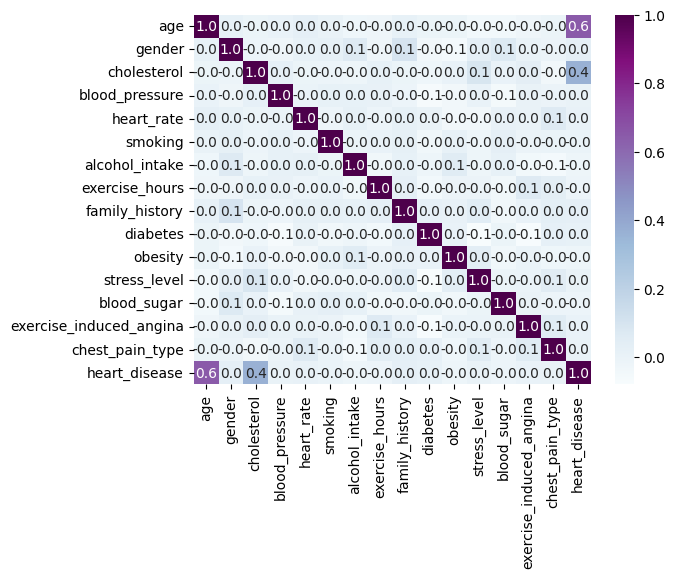

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

df.correlation = df.corr()
sns.heatmap(df.correlation, annot=True, cmap='BuPu', fmt='.1f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


### Inferences from the heat map
   - there is a noticable correlation between heart disesase(target feature) with age [0.6] and cholesterol[0.4].
   - they might be the decision factors for prediction
   - however there are some other features like, heart_rate, blood_pressure, obesity etc.
   - I carried out two types of models to study which has more effect in prediciting the target.

In [100]:
df.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,2,2,1,0,0,1,8,119,1,2,1
1,48,1,204,165,62,2,0,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,2,1
3,69,0,192,90,72,2,0,4,0,1,0,7,107,1,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0


### 5. **Split Dataset for "training" and "testing"**

In [101]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [102]:
from sklearn.model_selection import train_test_split
mldata_split_output = train_test_split(df, test_size=0.2)  # % of Test data required is given

# Training Data
train_data = mldata_split_output[0]
print(len(mldata_split_output[0]))

# Testing Data
test_data = mldata_split_output[1]
print(len(mldata_split_output[1]))

800
200


#### **6 Applying ML algorithm to the training data to Create a model**

In [103]:
model_1 = DecisionTreeRegressor().fit(X = train_data.drop(columns=["heart_disease"]), y = train_data["heart_disease"])
model_2 = SVR().fit(X = train_data.drop(columns=["heart_disease"]), y = train_data["heart_disease"])
model_3 = LinearRegression().fit(X = train_data.drop(columns=["heart_disease"]), y = train_data["heart_disease"])


#### **7 Evalute the "model" with the "testing" data ---> Make "prediction"**

In [104]:
y_predicted_model1 = model_1.predict(X = test_data.drop(columns=["heart_disease"]))
y_predicted_model2 = model_2.predict(X = test_data.drop(columns=["heart_disease"]))
y_predicted_model3 = model_3.predict(X = test_data.drop(columns=["heart_disease"]))


In [105]:
y_true = test_data["heart_disease"]


#### **8 Prediction results summary study - Metrics**

In [106]:
print("Model 1 - Decision Tree Regressor")
print("R2 Score: ", r2_score(y_true, y_predicted_model1))
print("Mean Squared Error: ", mean_squared_error(y_true, y_predicted_model1))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_predicted_model1))

print("\nModel 2 - Support Vector Regressor")
print("R2 Score: ", r2_score(y_true, y_predicted_model2))
print("Mean Squared Error: ", mean_squared_error(y_true, y_predicted_model2))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_predicted_model2))

print("\nModel 3 - Linear Regression")
print("R2 Score: ", r2_score(y_true, y_predicted_model3))
print("Mean Squared Error: ", mean_squared_error(y_true, y_predicted_model3))
print("Mean Absolute Error: ", mean_absolute_error(y_true, y_predicted_model3))

# Linear Regression Model


Model 1 - Decision Tree Regressor
R2 Score:  1.0
Mean Squared Error:  0.0
Mean Absolute Error:  0.0

Model 2 - Support Vector Regressor
R2 Score:  0.6828180654897145
Mean Squared Error:  0.07612366428246856
Mean Absolute Error:  0.22604860997600362

Model 3 - Linear Regression
R2 Score:  0.5595776847530587
Mean Squared Error:  0.10570135565926592
Mean Absolute Error:  0.273285142026659



### **Inferences:**
**used all features except the target (heart_disease)**
1. DECISION TREE REGRESSOR
   - gives a perfect score suggesting that the model is perfecly fitting the data.
   - may be due to the less input data.

2. SUPPORT VECTOR REGRESSOR
   - seems to perform better but not the best.

3. LINEAR REGRESSION
   - performance is quiet lower than SVR 
   - Couldn't fit a best line for the data points.

- Based on the above performance of the  models with respect to the features, further checking was done with droping few features based on the correlation.
- All the above models were **re-trained** and **tested** for its performance and the results are compared at the end of the document.

In [107]:
important_features = ["age", "cholesterol", "exercise_hours", 'blood_pressure', 'heart_rate', 'stress_level', 'blood_sugar']
X = df[important_features]
y = df["heart_disease"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nDecision Tree Metrics:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))


print("\nSupport Vector Machine Metrics:")
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))


print("\nLinear Regression Metrics:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))




Decision Tree Metrics:
R2 Score: 1.0
RMSE: 0.0
MAE: 0.0

Support Vector Machine Metrics:
R2 Score: 0.7048698061250362
RMSE: 0.26719280285657715
MAE: 0.21260349211323543

Linear Regression Metrics:
R2 Score: 0.5702090034989271
RMSE: 0.322438276346977
MAE: 0.2696507685799726


In [108]:
X = df[['age', 'cholesterol']]  # Features
y = df['heart_disease'] # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 800
Testing set size: 200


In [109]:
model_1 = DecisionTreeRegressor()
model_2 = SVR()
model_3 = LinearRegression()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train);

In [110]:
y1_pred = model_1.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y1_pred})
print(predictions.head())

     Actual  Predicted
521       1        1.0
737       0        0.0
740       0        0.0
660       0        0.0
411       1        1.0


In [111]:
y2_pred = model_2.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y2_pred})
print(predictions.head())

     Actual  Predicted
521       1   1.106969
737       0   0.267815
740       0   0.101991
660       0   0.215931
411       1   0.738281


In [112]:
y3_pred = model_3.predict(X_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y3_pred}) 
print(predictions.head())

     Actual  Predicted
521       1   0.881530
737       0   0.312741
740       0   0.041040
660       0   0.256593
411       1   0.792491


In [113]:
print("Model 1 - Decision Tree Regressor")
print("R2 Score: ", r2_score(y_test, y1_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y1_pred))  
print("Mean Absolute Error: ", mean_absolute_error(y_test, y1_pred))

print("\nModel 2 -  Support Vector Regressor")
print("R2 Score: ", r2_score(y_test, y2_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y2_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y2_pred))

print("\nModel 3 - Linear Regression")
print("R2 Score: ", r2_score(y_test, y3_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y3_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y3_pred))



Model 1 - Decision Tree Regressor
R2 Score:  1.0
Mean Squared Error:  0.0
Mean Absolute Error:  0.0

Model 2 -  Support Vector Regressor
R2 Score:  0.7474750617674937
Mean Squared Error:  0.06108578255844327
Mean Absolute Error:  0.19432491402652244

Model 3 - Linear Regression
R2 Score:  0.5791144734024987
Mean Squared Error:  0.10181220888393558
Mean Absolute Error:  0.2668325226891976


### **Final Inferences**
### Selecting features based on the correlation matrix to evaluate model performance 
1. selected few hightly correlated features to check models performance 
   - features are ---> "age", "cholesterol", "exercise_hours", 'blood_pressure', 'heart_rate', 'stress_level', 'blood_sugar'
### ** MODEL PERFORMANCE**
   - there seemed a slight improvement in SVC and LR model when compared to all features under training.
   - Reduced set (7 features): R² = 0.705 (Improved slightly) --->  SVR
   - Reduced set (7 features): R² = 0.570 (Slight improvement)  ----> LR
   
2. Feature selction was even more tuned down to two features which has high importance.
   - features are ---> "age" and "cholesterol"
### **MODEL PERFORMANCE**
   - this had a better performance than the previous two sets.
   - Only Age & Cholesterol: R² = 0.747 (Best improvement) ---> SVR
   - Only Age & Cholesterol: R² = 0.579 (Best result) ----> LR

**NOTE: Decision Tree Regressor perfomance was same regardless of the feature selction. This may be due to the less amount of data fed.**